In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [4]:
metadata = pd.read_csv('data/movies_metadata.csv', low_memory=False)
overview = metadata['overview']
genres = metadata['genres']

In [6]:
metadata.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


In [20]:
print ("num_movies: ", len(metadata))
overview = metadata['overview'].values
text_len = [len(str(i).split()) for i in overview]

print ("max_len: ", max(text_len))
print ("min_len: ", min(text_len))
print ("avg_len: ", np.mean(text_len))
print ("median_len: ", np.median(text_len))

num_movies:  45466
max_len:  187
min_len:  0
avg_len:  53.97400255135706
median_len:  47.0


In [21]:
# detail of columns original_language
print ("original_language: ", metadata['original_language'].value_counts())

original_language:  en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
zu           1
qu           1
104.0        1
la           1
si           1
Name: original_language, Length: 92, dtype: int64


num_genres:  32


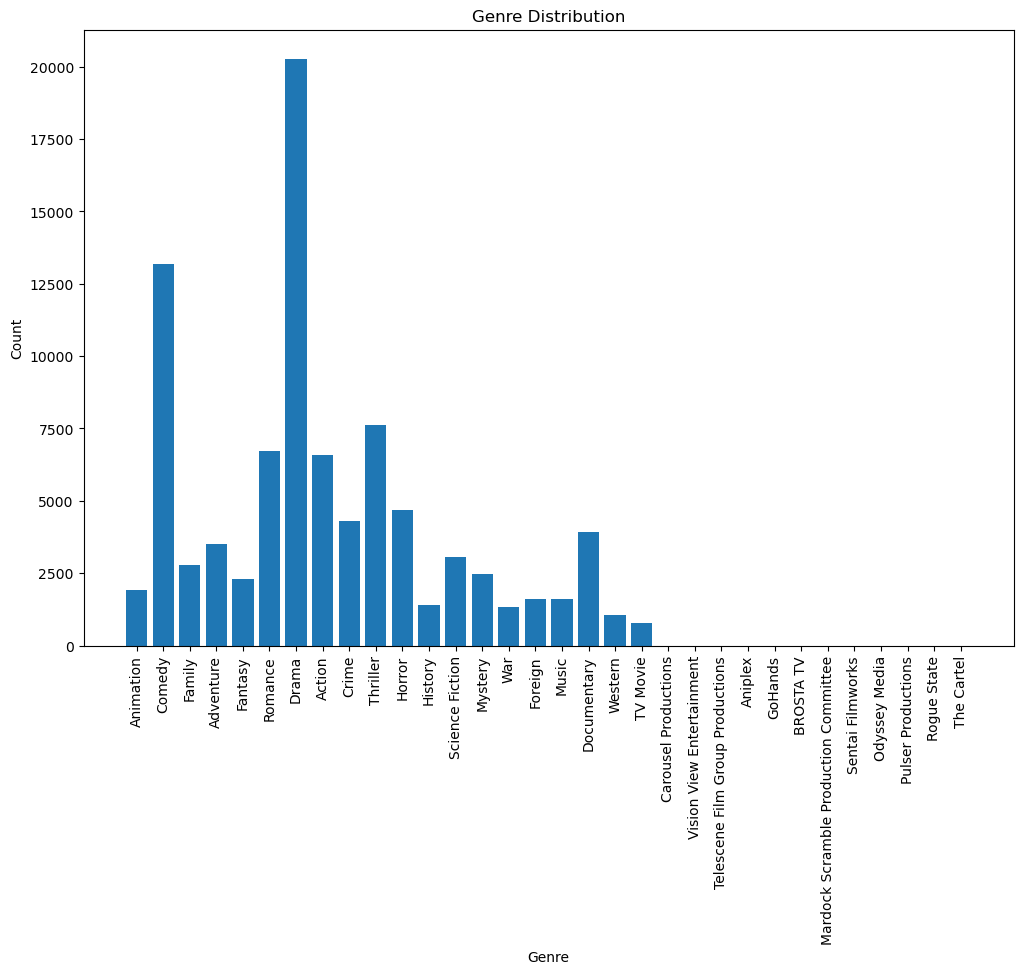

In [15]:
raw_genres = metadata['genres'].values
genre_count = defaultdict(int)
for data in raw_genres:
    names = [x["name"] for x in eval(data)]
    for name in names:
        genre_count[name] += 1
    
print ("num_genres: ", len(genre_count))
plt.figure(figsize=(12, 8))
plt.bar(genre_count.keys(), genre_count.values())
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()
